Import required libraries

In [94]:
import pandas as pd
import datetime
import matplotlib.pyplot as plt
%matplotlib inline
import yfinance as yf

Define range for analysis

In [33]:
start=datetime.datetime(2023,1,1)
end=datetime.datetime(2024,1,1)

Historical data for NIFTY

In [97]:
df_nifty = yf.download("^NSEI",start,end)
df_nifty.head()

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2023-01-02,18131.699219,18215.150391,18086.500000,18197.449219,18197.449219,256100
2023-01-03,18163.199219,18251.949219,18149.800781,18232.550781,18232.550781,208700
2023-01-04,18230.650391,18243.000000,18020.599609,18042.949219,18042.949219,235200
2023-01-05,18101.949219,18120.300781,17892.599609,17992.150391,17992.150391,269900
2023-01-06,18008.050781,18047.400391,17795.550781,17859.449219,17859.449219,238200


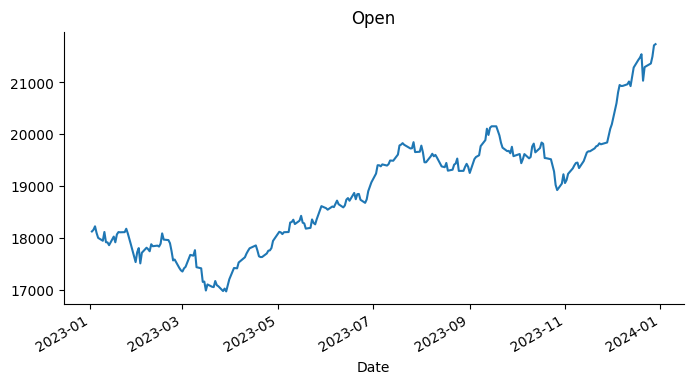

In [95]:
df_nifty['Open'].plot(kind='line', figsize=(8, 4), title='Open')
plt.gca().spines[['top', 'right']].set_visible(False)

Historical data for Mahindra & Mahindra

In [96]:
df_b = yf.download("M&M.NS",start,end)
df_b.head()

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2023-01-02,1251.000000,1271.000000,1242.599976,1262.849976,1227.834595,1718385
2023-01-03,1263.000000,1265.000000,1246.699951,1249.300049,1214.660400,1510751
2023-01-04,1252.349976,1255.800049,1231.000000,1236.199951,1201.923462,1344532
2023-01-05,1240.000000,1255.000000,1231.000000,1252.650024,1217.917480,2745160
2023-01-06,1252.650024,1274.949951,1248.150024,1264.900024,1229.827759,2214972


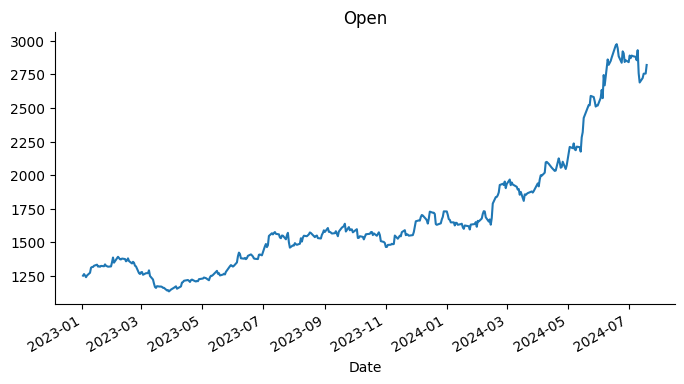

In [98]:
df_b['Open'].plot(kind='line', figsize=(8, 4), title='Open')
plt.gca().spines[['top', 'right']].set_visible(False)

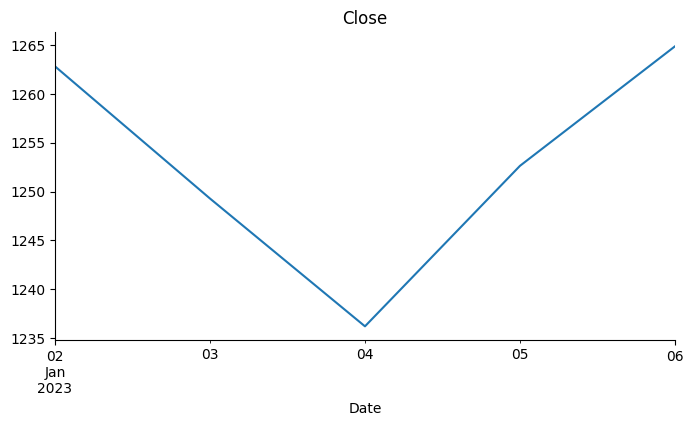

In [99]:
_df_11['Close'].plot(kind='line', figsize=(8, 4), title='Close')
plt.gca().spines[['top', 'right']].set_visible(False)

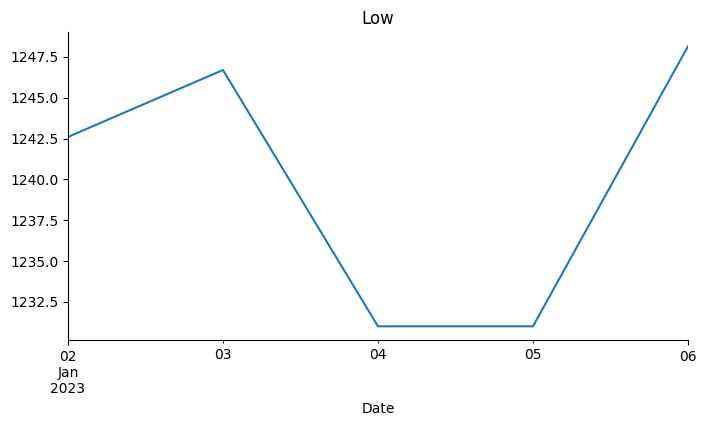

In [100]:
_df_10['Low'].plot(kind='line', figsize=(8, 4), title='Low')
plt.gca().spines[['top', 'right']].set_visible(False)

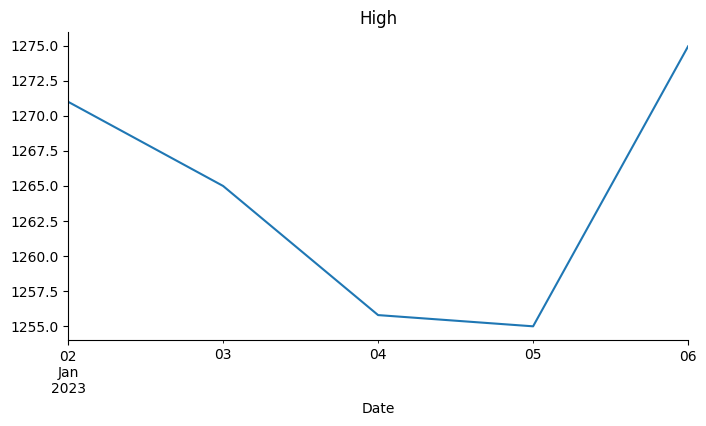

In [101]:
_df_9['High'].plot(kind='line', figsize=(8, 4), title='High')
plt.gca().spines[['top', 'right']].set_visible(False)

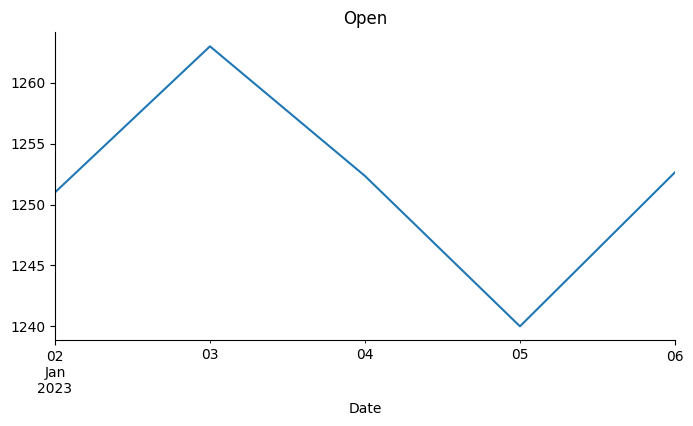

In [102]:
_df_8['Open'].plot(kind='line', figsize=(8, 4), title='Open')
plt.gca().spines[['top', 'right']].set_visible(False)

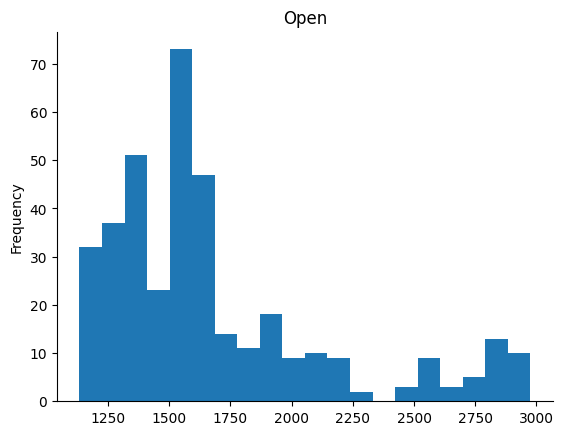

In [103]:
df_b['Open'].plot(kind='hist', bins=20, title='Open')
plt.gca().spines[['top', 'right',]].set_visible(False)

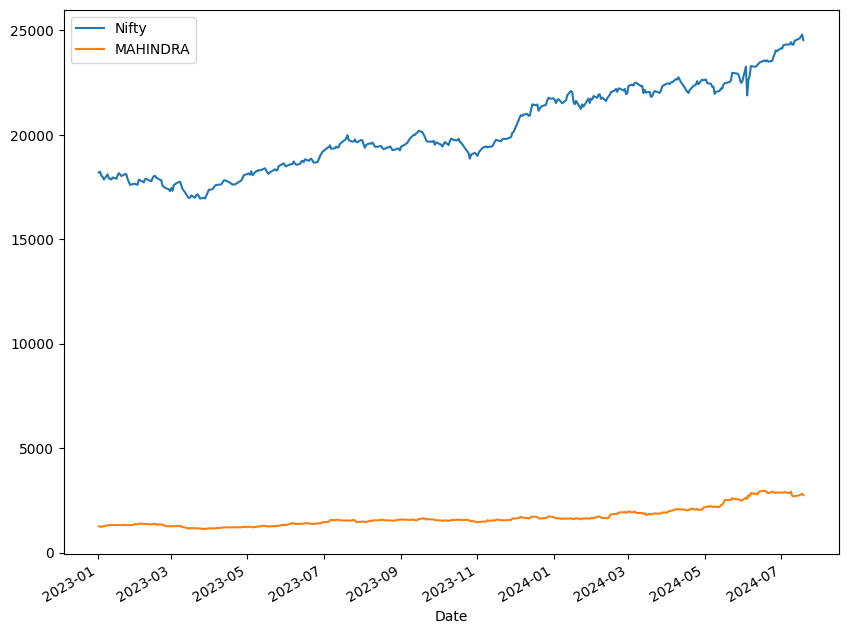

In [104]:
df_nifty['Close'].plot(label = 'Nifty', figsize=(10,8) )
df_b['Close'].plot(label = 'MAHINDRA')
plt.legend()

In [105]:
df_nifty['cum']=df_nifty["Close"]/df_nifty["Close"].iloc[0]
df_b['cum']=df_b["Close"]/df_b["Close"].iloc[0]


NIFTY V/S MAHINDRA

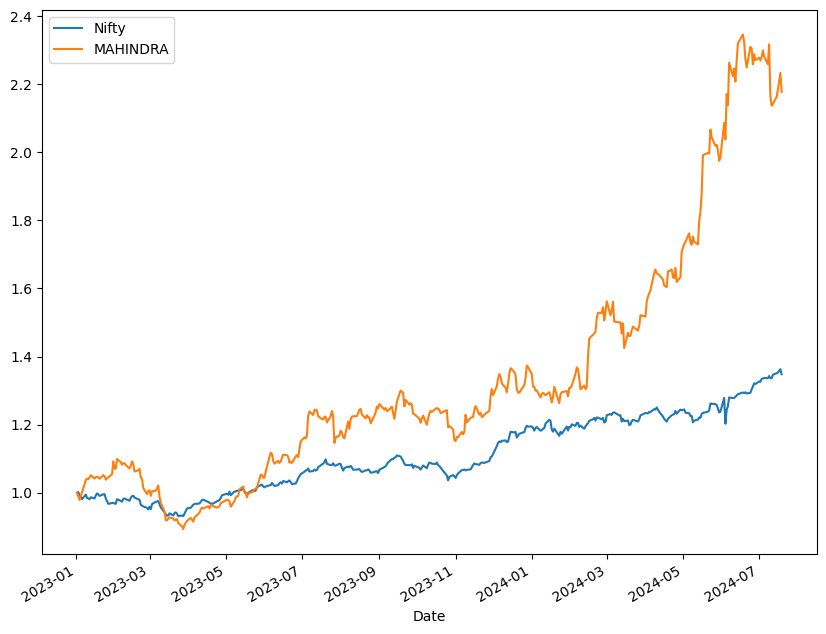

In [106]:
df_nifty['cum'].plot(label = 'Nifty', figsize=(10,8))
df_b['cum'].plot(label = 'MAHINDRA')
plt.legend()

In [107]:
df_nifty['daily_ret'] = df_nifty['Close'].pct_change(1)
df_b['daily_ret'] = df_b['Close'].pct_change(1)

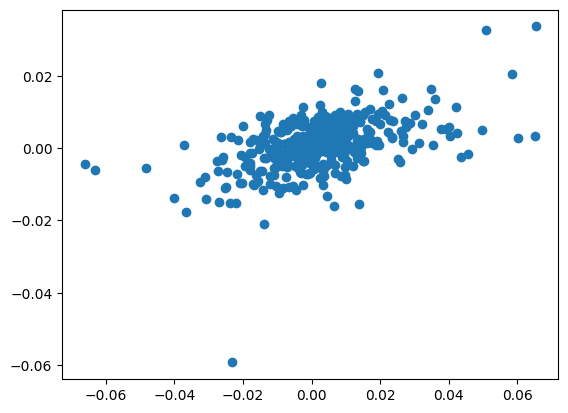

In [108]:
plt.scatter(df_b['daily_ret'],df_nifty['daily_ret'])

In [109]:
LR = stats.linregress(df_b['daily_ret'].iloc[1:],df_nifty['daily_ret'].iloc[1:])
LR

LinregressResult(slope=0.21896649164308965, intercept=0.00033582346291186754, rvalue=0.4980773195053707, pvalue=4.300336235331123e-25, stderr=0.019659501269126935, intercept_stderr=0.00033783127655546394)

In [110]:
beta,alpha,r_val,p_val,std_err = LR

In [112]:
beta

0.21896649164308965

In [113]:
alpha

0.00033582346291186754

In [114]:
date=datetime.datetime(2024,7,19)
end=datetime.datetime(2024,7,22)

In [49]:
rm = (df_nifty['Close'].iloc[-1]-df_nifty['Close'].iloc[0])/df_nifty['Close'].iloc[0]
rm

0.1942003590389879

In [50]:
rf=0.055 #fd return of sbi taken as risk free return
rf

0.055

In [51]:
r_val

0.4745940639973785

In [52]:
p_val

4.1362012515264255e-15

In [53]:
smb=0.15

In [54]:
hml=0.17

In [115]:
expected_return_capm= 1+beta*(rm-rf)
expected_return_capm

1.0304802142542255

In [116]:
df_mah=yf.download("M&M.NS",date,end)
df_mah

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2024-07-19,2819.949951,2819.949951,2743.0,2749.300049,2749.300049,2042568


In [117]:
actual_return=df_mah['Close'].iloc[0]/df_b['Close'].iloc[0]
actual_return

2.17705990575207

In [118]:
err_capm=(actual_return-expected_return_capm)/actual_return
err_capm

0.5266642817078366

In [119]:
expected_return_fama=1+beta*(rm-rf)+r_val*smb+p_val*hml+alpha
expected_return_fama

1.1055276356429429

In [120]:
err_fama=(expected_return_fama-actual_return)/actual_return
err_fama

-0.4921923679169334